# 11. Data Science with Astronimical Catalogs

## 11.1 Introduction

책에 나온 데이터는 아래의 소스에서 확인함

Spectral energy distributions of HII regions in M33 (HerM33es). (2013)

vizR : J/A+A/552/A140

1.	J/A+A/552/A140/catalog	Fluxes of our set of HII regions, and derived dust properties (tables B1–B3) (119 rows)



https://cdsarc.u-strasbg.fr/viz-bin/cat/J/A+A/552/A140

https://cdsarc.u-strasbg.fr/viz-bin/cat/J/A+A/552/A140#/browse

## 11.2 Filetypes and Reading in Data

### 11.2.1 ASCII (Text Files)

In [1]:
with open('BookDatasets/catalogs/relano2016_m33_apertures.txt','r') as f:
    data = f.read()

In [2]:
import os 
print(os.getcwd())

D:\Astronomical Python


In [3]:
f = open('BookDatasets/catalogs/relano2016_m33_apertures.txt','r')
data = f.read()
f.close()

In [4]:
data[:100]

'ID, RA, DEC, ap_radius, type\n  1, 01:32:32.330, +30 35 03.97, 48.5, Mixed\n  2, 01:32:34.685, +30 30 '

In [5]:
type(data)

str

```python
#에러 예문
import numpy as np
data = np.genfromtxt('BookDatasets/catalogs/relano2016_m33_apertures.txt')
```

<img src = "D:/Astronomical Python/Img/chap 11_1.png" width="800" height="500"/>

In [6]:
import numpy as np

data = np.genfromtxt('BookDatasets/catalogs/relano2016_m33_apertures.txt', skip_header=1, delimiter=',')

In [7]:
data[:5]

array([[ 1. ,  nan,  nan, 48.5,  nan],
       [ 2. ,  nan,  nan, 40.7,  nan],
       [ 3. ,  nan,  nan, 44.8,  nan],
       [ 4. ,  nan,  nan, 53.2,  nan],
       [ 5. ,  nan,  nan, 29.5,  nan]])

In [8]:
data = np.genfromtxt('BookDatasets/catalogs/relano2016_m33_apertures.txt',
                     skip_header=1,
                     delimiter=',',
                     dtype=(int,'<U25','<U25',float,'<U25'))
data[:5]

array([(1, ' 01:32:32.330', ' +30 35 03.97', 48.5, ' Mixed'),
       (2, ' 01:32:34.685', ' +30 30 27.45', 40.7, ' Mixed'),
       (3, ' 01:32:34.687', ' +30:27:29.01', 44.8, ' Mixed'),
       (4, ' 01:32:37.566', ' +30:40:08.76', 53.2, ' Clear Shell'),
       (5, ' 01:32:44.823', ' +30:34:58.75', 29.5, ' Filled')],
      dtype=[('f0', '<i8'), ('f1', '<U25'), ('f2', '<U25'), ('f3', '<f8'), ('f4', '<U25')])

In [9]:
import pandas as pd
data = pd.read_csv('BookDatasets/catalogs/relano2016_m33_apertures.txt')
data[:5]

,ID,RA,DEC,ap_radius,type
0,1,01:32:32.330,+30 35 03.97,48.5,Mixed
1,2,01:32:34.685,+30 30 27.45,40.7,Mixed
2,3,01:32:34.687,+30:27:29.01,44.8,Mixed
3,4,01:32:37.566,+30:40:08.76,53.2,Clear Shell
4,5,01:32:44.823,+30:34:58.75,29.5,Filled


In [10]:
data.columns

Index(['ID', ' RA', ' DEC', ' ap_radius', ' type'], dtype='object')

In [11]:
data = pd.read_csv('BookDatasets/catalogs/relano2016_m33_apertures.txt', skipinitialspace = True)
data.columns

Index(['ID', 'RA', 'DEC', 'ap_radius', 'type'], dtype='object')

In [12]:
data.loc[data.ap_radius > 55]

,ID,RA,DEC,ap_radius,type
5,6,01:32:44.903,+30:25:10.88,60.0,Clear Shell
27,28,01:33:15.673,+30:56:40.94,60.0,Mixed
28,29,01:33:15.870,+30:53:24.88,67.5,Mixed
32,33,01:33:23.026,+30:50:23.31,60.0,Mixed
39,40,01:33:28.248,+30:52:49.29,60.0,Shell
47,48,01:33:35.110,+31:00:54.44,60.0,Clear Shell
55,56,01:33:44.499,+31:02:04.51,60.0,Shell
82,83,01:34:10.505,+30:21:52.11,59.2,Clear Shell
86,87,01:34:13.301,+31:09:14.58,60.0,Clear Shell
97,98,01:34:33.060,+30:47:01.71,74.2,Mixed


### 11.2.2 Reading Tabular Data with Astropy

**`데이터 도메인 확인`**
- NASA-슬론 아틀라스 데이터는 슬론 디지털 스카이 서베이 영상에서 추출한 지역 은하의 이미지와 매개변수 카탈로그 
    + 스펙트럼 에너지 분포의 자외선 부분에 대한 은하 진화 탐색기(GALEX) 데이터가 추가 
    + 주요 문서는 NASA-슬론 아틀라스 웹사이트에서 확인 가능
        + http://nsatlas.org/
        + https://www.sdss4.org/dr17/manga/manga-target-selection/nsa/

**`데이터 다운`**
- 현재 다운받은 NASA-Sloan Atlas 데이터의 버전은 v1_0_1 (책은 v0_1_2 사용) 
    + 이 버전에는 이전에 공개된 버전(v0_1_2)에 비해 몇 가지 새로운 기능이 포함되어 있음

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

with fits.open('BookDatasets/catalogs/nsa_v1_0_1.fits') as hdu:
    table = hdu[1].data

In [14]:
table[0][0:30]

('J094651.40-010228.5', '09h/m00/J094651.40-010228.5', np.float64(146.714215072841), np.float64(-1.0412800233313741), np.int32(0), np.int32(72212), np.int32(37354), np.int32(-1), np.int32(-1), np.int32(-1), np.float32(15.178774), np.float32(0.021222278), 'sdss', np.float32(0.07), np.int16(756), np.uint8(1), np.int16(206), '301', np.float32(136.2967), np.float32(1095.152), np.int32(0), np.float32(0.020687785), array([  29.696056,   53.397354,  179.53214 ,  821.93317 , 1789.2572  ,
       2541.8564  , 3267.6895  ], dtype='>f4'), array([2.9814342e-01, 1.9511411e-01, 1.4045030e-02, 4.3201544e-03,
       9.1487652e-04, 4.5338270e-04, 1.2172792e-04], dtype='>f4'), np.int16(1), array([  31.368013,   49.736797,  199.63586 ,  828.36523 , 1726.3643  ,
       2488.9421  , 3501.2527  ], dtype='>f4'), array([-15.17281 , -15.820621, -17.213867, -18.827549, -19.66463 ,
       -20.030403, -20.302134], dtype='>f4'), array([ 223.03555,  471.9321 ,  384.02402, 2475.846  , 2484.6162 ,
       2484.9539 , 1

In [15]:
from astropy.table import Table 
table = Table.read('BookDatasets/catalogs/nsa_v1_0_1.fits')

In [16]:
table[:2]

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,bytes8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.00024172392,1,28.661283 .. 2337.7668,-15.124495 .. -19.915525,293.50247 .. 1094.6666,-0.010805 .. 0.009306902,3.9630737e-05 .. 2.6251464e-06,6833158000.0,0.00017553588 .. 1.14686,0.004447123,0.09061434,0.025269886,0.0
J094630.85-004554.5,09h/m00/J094630.85-004554.5,146.6285851269414,-0.7651620976591762,1,-1,-1,-1,-1,-1,17.318521,0.06465632,sdss,0.06491773,1239,2,175,301,735.56384,1277.3636,1,0.06403577,2.4606192 .. 443.66675,5.447516 .. 0.006137319,1,2.6590455 .. 454.05856,-14.978118 .. -20.68

In [17]:
from astropy.table import Table
table = Table.read('BookDatasets/catalogs/Carlsten.txt', format="ascii.cds")

In [18]:
table.to_pandas()

,Name,RAdeg,DEdeg,Host,Dist-host,Dist,lb2Dist,lb1Dist,ub1Dist,ub2Dist,SNR,Source,Confirm,vrec,r_vrec,Dtrgb,r_Dtrgb
0,NGC247,11.783,-20.757,NGC253,3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,S,3.72,a
1,dw0047m2623,11.894,-26.390,NGC253,3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,3.90,b
2,dw0049m2100,12.454,-21.017,NGC253,3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295,S,3.44,a
3,dw0050m2444,12.575,-24.737,NGC253,3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,3.12,c
4,dw0055m2309,13.754,-23.169,NGC253,3.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,a,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,dw1905m6316,286.483,-63.272,NGC6744,8.95,7.61,5.57,6.55,8.77,10.26,5.57,DECAM,False,<NA>,NaN,NaN,NaN
247,dw1906m6357,286.742,-63.964,NGC6744,8.95,7.31,5.55,6.44,8.21,9.17,9.68,DECAM,False,<NA>,NaN,NaN,NaN
248,dw1907m6342,286.844,-63.706,NGC6744,8.95,7.99,6.26,7.12,8.94,10.01,11.51,DECAM,False,<NA>,NaN,NaN,NaN
249,dw1908m6343,287.183,-63.730,NGC6744,8.95,5.33,4.35,4.80,5.96,6.73,43.93,DECAM,True,<NA>,NaN,NaN,NaN


### 11.2.3 ASDF (Advanced Science Data Format)

In [19]:
import asdf
from asdf import AsdfFile
import numpy as np

tree = {
    'a': np.arange(0,10),
    'b': np.arange(10,20)
}

In [20]:
tree

{'a': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'b': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}

In [21]:
target = AsdfFile(tree)
target.write_to('target.asdf')

In [22]:
with asdf.open("target.asdf") as af:
    tree2 = af.tree

In [23]:
tree2

{'asdf_library': {'author': 'The ASDF Developers', 'homepage': 'http://github.com/asdf-format/asdf', 'name': 'asdf', 'version': '4.0.0'}, 'history': {'extensions': [{'extension_class': 'asdf.extension._manifest.ManifestExtension', 'extension_uri': 'asdf://asdf-format.org/core/extensions/core-1.6.0', 'manifest_software': {'name': 'asdf_standard', 'version': '1.1.1'}, 'software': {'name': 'asdf', 'version': '4.0.0'}}]}, 'a': <array (unloaded) shape: [10] dtype: int64>, 'b': <array (unloaded) shape: [10] dtype: int64>}

In [24]:
af = asdf.open("target.asdf")
af.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 4.0.0
├─history (dict)
│ └─extensions (list)
│   └─[0] (ExtensionMetadata)
│     ├─extension_class (str): asdf.extension._manifest.ManifestExtension
│     ├─extension_uri (str): asdf://asdf-format.org/core/extensions/core-1.6.0
│     ├─manifest_software (Software)
│     │ ├─name (str): asdf_standard
│     │ └─version (str): 1.1.1
│     └─software (Software)
│       ├─name (str): asdf
│       └─version (str): 4.0.0
├─a (NDArrayType): shape=(10,), dtype=int64
└─b (NDArrayType): shape=(10,), dtype=int64


In [25]:
af['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
af['b']

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

### 11.2.4 HDF5 (Hierachical Data Format 5)

In [27]:
import h5py
import numpy as np

# 파일 생성
file = h5py.File('example.h5', 'w')

# 데이터셋 생성
data = np.random.randn(1000)  # 임의의 데이터
file.create_dataset('dataset1', data=data)

# 그룹 생성 후 데이터셋 추가
group = file.create_group('subgroup')
group.create_dataset('dataset2', data=np.random.randn(500))

# 파일 닫기
file.close()

In [28]:
# 파일 불러오기

import h5py

# 파일 열기
file = h5py.File('example.h5', 'r')

In [29]:
# 파일 내 요소 확인

data_keys = list(file.keys())
data_keys

['dataset1', 'subgroup']

In [30]:
# 루트 레벨의 키 리스트 출력
print("Root level keys:", list(file.keys()))

# 특정 그룹 내의 키를 리스트로 출력
if 'subgroup' in file:
    print("Keys in 'subgroup':", list(file['subgroup'].keys()))

Root level keys: ['dataset1', 'subgroup']
Keys in 'subgroup': ['dataset2']


In [31]:
# 데이터셋 읽기
data1 = file['dataset1'][:10]
data2 = file['subgroup/dataset2'][:10]

print("Dataset1:", data1)
print("subgroup/dataset2:", data2)

# 파일 닫기
# file.close()

Dataset1: [ 1.42233238 -0.04471166 -0.93877658  0.1909586   0.60585244 -1.19278978
 -0.86431104 -1.41413472 -0.84977812 -1.02835495]
subgroup/dataset2: [ 0.55395151  0.26818614 -0.46468099 -1.16600447 -1.24707238  1.49755281
  1.5791685   0.98675937  0.60640718  0.03963573]


## 11.3 Working with Tabular Data in Pandas

이 절에서 사용하는 데이터에 대한 도메인 정리

- https://archive.stsci.edu/prepds/3d-hst/

- 3D-HST 프로젝트의 관측은 총 248 궤도로 구성되며, 이는 124개의 개별 지점(pointings)으로 나뉘어 각각 두 궤도 동안 관측됨
- 이렇게 배분된 관측은 CANDELS 프로젝트의 같은 필드 관측과 동시에 수행되기 위해 허블 우주 망원경의 18, 19 사이클 동안 예정
    - 관측 지점의 방향은 관측이 예정된 후에 결정되었으며, 개별 지점의 위치는 연속적인 모자이크와 주요 WFC3 G141 및 병렬 ACS G800L 관측 사이의 최대 중첩을 제공하도록 최적화됨
- 이 최적화 덕분에 G141 모자이크의 거의 90%가 ACS 그리즘의 2~4 궤도 커버리지로 커버됨
    - 특히, GOODS-South 모자이크 내에서는 허블 울트라 딥 필드(HUDF)를 중심으로 한 4개의 두 궤도 방문이 동일한 방향으로 이루어짐
    - CANDELS 커버리지 밖의 GOODS-South 지점들은 HUDF09 및 WFC3-ERS 필드에 대한 WFC3 그리즘 분광학을 제공함


<img src = "D:/Astronomical Python/Img/chap 11_2 3dhst_pointings_300.png" width="800" height="500"/>

- 이 포인팅들은 허블 우주 망원경(HST)의 Phase II 파일에서 정의된 포인팅 ID 번호와 함께 표시된 기본 WFC3 F140W+G141 포인팅을 파란색으로 보여줌.
- 병렬로 수행된 ACS F814W+G800L 관측 위치는 연두색으로 표시되며 또한, 프로그램 GO-11600에서 GOODS-North 필드를 커버하는 28개의 포인팅이 3D-HST에 통합된 것도 표시됨
    + 이 지도에는 CANDELS 조사의 WFC3 이미징 영역을 나타내는 밝은 회색 다각형도 포함되어 있으며, 이는 CANDELS 조사의 "wide" 및 "deep" 구성 요소 모두를 포함함
        + 각 필드의 상대적 크기가 정확히 축척에 맞춰 표시되지 않았다는 점에 대해 주의

**데이터 셋에 대한 설명**

- 3D-HST 프로젝트의 최종 데이터셋 릴리즈는 2015년 10월에 3D-HST 웹사이트에서 이루어짐
- 이 v4.1.5 릴리즈와 2014년의 v4.1 광도학적 릴리즈는 모두 웹사이트에서 보관 및 제공되며, 이 데이터셋은 AEGIS, COSMOS, GOODS-N, GOODS-S, UDS 등 3D-HST/CANDELS 조사의 모든 다섯 필드를 커버함
- 데이터와 방법에 대한 전체 설명은 Momcheva et al. (2015)과 Skelton et al. (2014)의 연구를 참조

**v4.1.5 릴리즈는 다음을 포함**
> + **(WFC3 2D 및 1D 스펙트럼 추출)** 약 250,000개 객체에 대한 스펙트럼 추출
> + **(적색편이)** 그리즘 스펙트럼과 광도계 데이터를 결합한 공동 적합을 통해 JH=26 등급까지 약 100,000개 객체의 적색편이 제공
> + **(방출선 적합)** JH=26 등급까지 모든 주요 방출선에 대한 fitting 진행
> + **(최적 적색편이 카탈로그)** 다섯 필드에서 스펙트럼, 그리즘, 광도계 적색편이를 결합한 최적의 적색편이 카탈로그 제공
> + **(성질 질량 및 별 형성률)** 그리즘 적색편이 및 최적 적색편이 카탈로그에 대해 22개 밴드의 휴식프레임 색상, 스텔라 질량, 자외선+적외선 별 형성률 제공
> + **(ACS 2D 및 1D 스펙트럼 추출)** 약 25,000개 객체에 대한 스펙트럼 추출

우리는 이중에서 cosmos 영역에 대한 데이터를 사용

- (cosmos_3dhst.v4.1.cat.FITS) photometric catalog, FITS format
- (cosmos_3dhst.v4.1.master.RF.FITS) rest frame colors, fits format
- (cosmos_3dhst.v4.1.5.zbest.fout) FAST output file, ASCII format
- (cosmos_3dhst.v4.1.5.zbest.sfr) star formation rate, ASCII format

**참고**

> “Best” Catalogs
> 
> "best" redshift catalog, by merging the grism redshift fits with the photometric redshifts from Skelton et
al. (2014). The best redshift is:
>
> - **z_spec** if it exists from the Skelton et al. (2014) compilation of spectroscopic redshifts
> - **z_max_grism** if there is no spectroscopic redshift and use_grism = 1
> - **z_phot** if there is no spectroscopic redshift and use_grism <1
> 
> - **(field_name_3dhst.v4.1.5.zbest.fout)** FAST fits using z_best
> - **(field_name_3dhst.v4.1.5.zbest.sfr)** star-formation rates calculated using z_best


In [32]:
from astropy.table import Table
import pandas as pd

sfr_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.5.zbest.sfr'
fast_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.5.zbest.fout'
rf_colors_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.master.RF.FITS'
photometry_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.cat.FITS'

sfr_df = pd.read_csv(sfr_file,delim_whitespace=True)
fast_df = pd.read_csv(fast_file,delim_whitespace=True)
rf_colors_df = Table.read(rf_colors_file)
phot_df = Table.read(photometry_file).to_pandas()

C:\Users\jeffr\AppData\Local\Temp\ipykernel_7060\1660628502.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sfr_df = pd.read_csv(sfr_file,delim_whitespace=True)
C:\Users\jeffr\AppData\Local\Temp\ipykernel_7060\1660628502.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fast_df = pd.read_csv(fast_file,delim_whitespace=True)


In [33]:
fast_df.head()

,id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
0,1,0.89,7.0,0.02,9.7,2.1,10.46,-99.00,-99.00,2.7,56.700
1,2,0.89,7.0,0.02,9.7,2.0,10.41,-99.00,-99.00,2.7,43.400
2,3,0.81,8.4,0.02,9.2,0.3,10.45,-0.45,-10.90,0.8,1.090
3,4,3.10,8.8,0.02,9.3,0.2,10.16,0.23,-9.93,0.5,0.948
4,5,0.51,7.0,0.02,9.9,0.6,8.55,-99.00,-99.00,2.9,7.010


(warning) 
- 이 경고 메시지는 pandas 라이브러리에서 pd.read_csv() 함수를 사용할 때 나타나는 것으로, delim_whitespace 파라미터가 더 이상 사용되지 않을 예정이라는 것을 알리는 내용
- delim_whitespace=True는 CSV 파일을 읽을 때 공백 문자(스페이스나 탭 등)를 필드 구분자로 사용하게 하는 옵션

In [34]:
# 수정 코드 

from astropy.table import Table
import pandas as pd

sfr_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.5.zbest.sfr'
fast_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.5.zbest.fout'
rf_colors_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.master.RF.FITS'
photometry_file = 'BookDatasets/catalogs/cosmos_3dhst.v4.1.cat.FITS'

sfr_df = pd.read_csv(sfr_file,sep='\s+')
fast_df = pd.read_csv(fast_file,sep='\s+')
rf_colors_df = Table.read(rf_colors_file)
phot_df = Table.read(photometry_file).to_pandas()

In [35]:
# 데이터 프레임 구조로 변환되었는지 확인

fast_df.head()

,id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
0,1,0.89,7.0,0.02,9.7,2.1,10.46,-99.00,-99.00,2.7,56.700
1,2,0.89,7.0,0.02,9.7,2.0,10.41,-99.00,-99.00,2.7,43.400
2,3,0.81,8.4,0.02,9.2,0.3,10.45,-0.45,-10.90,0.8,1.090
3,4,3.10,8.8,0.02,9.3,0.2,10.16,0.23,-9.93,0.5,0.948
4,5,0.51,7.0,0.02,9.9,0.6,8.55,-99.00,-99.00,2.9,7.010


#### Star Formulation Rate

|Column name | Column Content    |
|------------|-------------------|
|id          |Photometric id from Skelton et al. (2014)|
|sfr         |Star formation rate: sfr = sfr_IR + sfr_UV [Msun/yr]|
|sfr_IR      |IR star formation rate: sfr_IR = 1.09E-10*L_IR [Msun/yr] |
|sfr_UV      |UV star formation rate: sfr_UV = 1.09E-10*(2.2L_UV) [Msun/yr]|
|L_IR        |IR (8-1000micron) luminosity, measured from Spitzer/MIPS 24 um photometry [Lsun]|
|L_UV        |Total integrated (1216-3000A) rest-frame UV luminosity, defined as L_UV=1.5muL_2800[Lsun] |
|flag        |flag = 1 for 24 um aperture flux densities with 0 < S/N < 1 |
||flag = 2 for negative 24 micron aperture flux densities|
||flag = -99 when z_max_grism<=0.|
|z_best      |Best fitted Redshift | 
|z_type      |Redshift source: 1 = ground-based spectroscopy; 2 = grism; 3 = photometry; 0 = star |
|f24tot      |Best fitted Redshift | 
|ef24tot     |Error in the total 24 um flux [AB zeropoint of 25]| 
|L_1600      |Rest-frame 1600 A luminosity|
|L_2800      |Rest-frame 2800 A luminosity|
| beta       |Rest-frame UV spectral slope, determined from a power-law fit of the form f_lambda ~ lambda^beta|



In [36]:
sfr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       33879 non-null  int64  
 1   sfr      33879 non-null  float64
 2   sfr_IR   33879 non-null  float64
 3   sfr_UV   33879 non-null  float64
 4   L_IR     33879 non-null  float64
 5   L_UV     33879 non-null  float64
 6   flag     33879 non-null  int64  
 7   z_best   33879 non-null  float64
 8   z_type   33879 non-null  int64  
 9   f24tot   33879 non-null  float64
 10  ef24tot  33879 non-null  float64
 11  L_1600   33879 non-null  float64
 12  L_2800   33879 non-null  float64
 13  beta     33879 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 3.6 MB


#### Stellar Population Fits

Output from FAST (see Kriek et al. 2009 for details)

The header of the .fout file is as follows:

-    id         z      ltau     metal      lage        Av     lmass      lsfr     lssfr      la2t      chi2
- FAST version: 0.9b
- Photometric catalog file: uds_3dhst.v4.1.cat
- Photometric redshift file: uds_3dhst.v4.1.zout
- Template error function: TEMPLATE_ERROR.fast.v0.2
- AB ZP:        25.00
- Library:      Bruzual & Charlot (2003)
- SFH:          Exponentially declining SFH: SFR ~ exp(-t/tau)
- Stellar IMF:  Chabrier
- metallicity:  0.020
- log(tau/yr):  7.0    - 10.0, in steps of 0.20
- log(age/yr):  7.6    - 10.1, in steps of 0.10
- A_V:          0.0    -  4.0, in steps of 0.10
- z:            0.0100 -  6.0000, in steps of 0.0100
- Filters:     205  88 122  79 236 123 124 239 125 203 263 204 264 265  18  19  20  21
- ltau: log[tau/yr], lage: log[age/yr], lmass: log[mass/Msol], lsfr: log[sfr/(Msol/yr)], lssfr: log[ssfr*yr], la2t: log[age/tau]
- or sfr=0. lsfr is set to -99	
- id         z      ltau     metal      lage        Av     lmass      lsfr     lssfr  la2t      chi2

|Column |Name       |Column Content|
|-------|-----------|------------------------------|
|1      |id 		|Unique identifier within a given field
|2      |z			|Redshift used in fit z_spec if exists in input catalog, z_peak from eazy otherwise  
|3      |ltau		|logtau/yr  
|4      |metal		|metallicity 
|5      |lage		|logage/yr  
|6      |Av     	|Dust attenuation in the V-band
|7      |lmass      |log Mstar/Msun  
|8      |lsfr     	|log SFR/Msun/yr    
|9      |lssfr      |log SSFR * yr  
|10     |la2t      	|log age/tau  
|11     |chi2		|chi squared of fit


In [37]:
fast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33879 non-null  int64  
 1   z       33879 non-null  float64
 2   ltau    33879 non-null  float64
 3   metal   33879 non-null  float64
 4   lage    33879 non-null  float64
 5   Av      33879 non-null  float64
 6   lmass   33776 non-null  float64
 7   lsfr    33831 non-null  float64
 8   lssfr   33879 non-null  float64
 9   la2t    33879 non-null  float64
 10  chi2    33879 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB


#### Rest Frame Colors

The filters are numbered in the EAZY format and listed in *_3dhst.v4.1.master.RF. 

All fluxes are normalized to an AB zeropoint of 25, such that: magAB = 25.0-2.5*log10(flux). 

Rest-frame colors are calculated as color = -2.5*log(Lfilter1/Lfilter2)


|Column  |Name       |Column Content|
|----------------|-------------------|---------------------------|
|1     |id				|Unique identifier within a given field
|2     |z				|Redshift z_spec if it exists, z_peak from EAZY otherwise   
|3     |DM 				|Distance modulus for a W_M/W_L/H0 = 0.3/0.7/70 cosmology
|4     |L153			|Fnu flux density for filter REST_FRAME/maiz-apellaniz_Johnson_U.res with an AB zeropoint of 25 
|5     |n_153 			|Number of filters considered in RF fit for L153 
|6     |L154 			|Fnu flux density for filter REST_FRAME/maiz-apellaniz_Johnson_B.res with an AB zeropoint of 25 
|7     |n_154 			|Number of filters considered in RF fit for L154
|8     |L155 			|Fnu flux density for filter RREST_FRAME/maiz-apellaniz_Johnson_V.res with an AB zeropoint of 25 
|9     |n_155 			|Number of filters considered in RF fit for L155
|10    |L161 			|Fnu flux density for filter 2MASS/J.res with an AB zeropoint of 25 
|11    |n_161 			|Number of filters considered in RF fit for L161
|12    |L162 			|Fnu flux density for filter 2MASS/H.res with an AB zeropoint of 25 
|13    |n_162 			|Number of filters considered in RF fit for L162
|14    |L163 			|Fnu flux density for filter 2MASS/K.res with an AB zeropoint of 25 
|15    |n_163 			|Number of filters considered in RF fit for L163
|16    |L156 			|Fnu flux density for filter SDSS/u.dat with an AB zeropoint of 25 
|17    |n_156 			|Number of filters considered in RF fit for L156
|18    |L157 			|Fnu flux density for filter SDSS/g.da with an AB zeropoint of 25 
|19    |n_157 			|Number of filters considered in RF fit for L157
|20    |L158 			|Fnu flux density for filter SDSS/r.dat with an AB zeropoint of 25 
|21    |n_158 			|Number of filters considered in RF fit for L158
|22    |L159 			|Fnu flux density for filter SDSS/i.dat with an AB zeropoint of 25 
|23    |n_159 			|Number of filters considered in RF fit for L159
|24    |L160 			|Fnu flux density for filter SDSS/z.dat with an AB zeropoint of 25 
|25    |n_160 			|Number of filters considered in RF fit for L160
|26    |L135 			|Fnu flux density for filter REST_FRAME/Bessel_UX.dat with an AB zeropoint of 25 
|27    |n_135 			|Number of filters considered in RF fit for L135
|28    |L136 			|Fnu flux density for filter REST_FRAME/Bessel_B.dat with an AB zeropoint of 25 
|29    |n_136 			|Number of filters considered in RF fit for L136
|30    |L137 			|Fnu flux density for filter REST_FRAME/Bessel_V.da with an AB zeropoint of 25 
|31    |n_137 			|Number of filters considered in RF fit for L137
|32    |L138 			|Fnu flux density for filter REST_FRAME/Bessel_R.dat with an AB zeropoint of 25 
|33    |n_138 			|Number of filters considered in RF fit for L138
|34    |L139 			|Fnu flux density for filter REST_FRAME/Bessel_I.dat with an AB zeropoint of 25 
|35    |n_139 			|Number of filters considered in RF fit for L139
|36    |L270 			|Fnu flux density for filter RestUV/Tophat_1400_200.dat with an AB zeropoint of 25 
|37    |n_270 			|Number of filters considered in RF fit for L270
|38    |L271 			|Fnu flux density for filter RestUV/Tophat_1700_200.dat with an AB zeropoint of 25 
|39    |n_271 			|Number of filters considered in RF fit for L271
|40    |L272 			|Fnu flux density for filter RestUV/Tophat_2200_200.dat with an AB zeropoint of 25 
|41    |n_272 			|Number of filters considered in RF fit for L272
|42    |L273 			|Fnu flux density for filter RestUV/Tophat_2700_200.dat with an AB zeropoint of 25 
|43    |n_273 			|Number of filters considered in RF fit for L273
|44    |L274 			|Fnu flux density for filter RestUV/Tophat_2800_200.dat with an AB zeropoint of 25 
|45    |n_274 			|Number of filters considered in RF fit for L274
|46    |L275 			|Fnu flux density for filter RestUV/Tophat_5500_200.dat with an AB zeropoint of 25 
|47    |n_275  			|Number of filters considered in RF fit for L275


In [38]:
rf_colors_df.info()

<Table length=33879>
 name  dtype 
----- -------
   id   int64
    z float64
   dm float64
 l153 float64
n_153   int64
 l154 float64
n_154   int64
 l155 float64
n_155   int64
 l161 float64
n_161   int64
 l162 float64
n_162   int64
 l163 float64
n_163   int64
 l156 float64
n_156   int64
 l157 float64
n_157   int64
 l158 float64
n_158   int64
 l159 float64
n_159   int64
 l160 float64
n_160   int64
 l135 float64
n_135   int64
 l136 float64
n_136   int64
 l137 float64
n_137   int64
 l138 float64
n_138   int64
 l139 float64
n_139   int64
 l270 float64
n_270   int64
 l271 float64
n_271   int64
 l272 float64
n_272   int64
 l273 float64
n_273   int64
 l274 float64
n_274   int64
 l275 float64
n_275   int64


#### Photometric Catalog


The detailed methods for creating the catalogs are described in a companion paper - Skelton et al. (2014). 
The photometric catalog for the COSMOS field contains the following datasets:

| Bands             |  Survey    |  Reference                |
|-------------------|------------|---------------------------|
| u,g,r,i,z         | CFHTLS     | Erben et al. (2009)       |
|                   |            | Hildebrandt et al. (2009) |
| Bj, Vj, r+,i+,z+, 12 medium bands    |            |Taniguchi et al. (2007)    |
| F606W,F814W       | CANDELS    | Grogin et al. 2011,       |
|                   |            | Koekemoer et al. 2011     |
| J1,J2,J3          | NMBS       | Whitaker et al. (2011)    |
| H1,H2,K           |            |                           |
| J, H, Ks          | UltraVISTA | McCracken et al. (2012)   |
| Y, J, H, Ks       | WIRDS      | Bielby et al. (2012)      |
| F140W             | 3D-HST     | Brammer et al. 2012       |
| F125W,F160W       | CANDELS    | Grogin et al. 2011,       |
|                   |            | Koekemoer et al. 2011     |
| 3.6,4.5um         | SEDS       | Ashby et al. (2013)       |
| 5.8,8.0um         | EGS        | Barmby et al. (2008)      |


All fluxes are normalized to an AB zeropoint of 25, such that: magAB = 25.0-2.5*log10(flux)


|Column          |Name               |Column Content             |
|----------------|-------------------|---------------------------|
|1    |id					  |Unique identifier within a given field  	
|2    |x					|	  X centroid in image coordinates
|3    |y					|	  Y centroid in image coordinates  
|4    |ra					  |RA J2000 degrees 
|5    |dec					  |Dec J2000 degrees   
|6    |faper_F160W			  |Flux within a 0.7 arcsecond aperture in F160W zeropoint 25.0 	  
|7    |eaper_F160W			  |1 sigma error within a 0.7 arcsecond aperture in F160W zeropoint 25.0 
|8    |faper_F140W			  |Flux within a 0.7 arcsecond aperture in F140W zeropoint 25.0 		  
|9    |eaper_F140W			  |1 sigma error within a 0.7 arcsecond aperture in F140W zeropoint 25.0 		  
|10   |f_F160W				  |Total flux in F160W zeropoint 25 	  
|11   |e_F160W				  |1 sigma error in F160W total flux zeropoint 25 	  
|12   |w_F160W				  |Weight relative to 95th percentile within F160W weight map
|13   |f_U                    | Total flux in U  zeropoint 25 
|14   |e_U					  |1 sigma error in U total flux zeropoint 25 
|15   |w_U                    | Weight relative to 95th percentile within U weight map						  
|16   |f_B                    | Total flux in B zeropoint 25 						  
|17   |e_B					  |1 sigma error in B total flux zeropoint 25 				
|18   |w_B                    | Weight relative to 95th percentile within B weight map						  
|19   |f_G                    | Total flux in G zeropoint 25 						  
|20   |e_G					  |1 sigma error in G total flux zeropoint 25 						  
|21   |w_G                    | Weight relative to 95th percentile within G weight map						  
|22   |f_V                    | Total flux in V zeropoint 25 						  
|23   |e_V					  |1 sigma error in V total flux zeropoint 25 						  
|24   |w_V                    | Weight relative to 95th percentile within V weight map						  
|25   |f_F606W                | Total flux in F606W zeropoint 25 						  
|26   |e_F606W			      |1 sigma error in F606W total flux zeropoint 25 						  
|27   |w_F606W                | Weight relative to 95th percentile within F606W weight map						  
|28   |f_R                    | Total flux in R zeropoint 25 						  
|29   |e_R					  |1 sigma error in R total flux zeropoint 25 						  
|30   |w_R                    | Weight relative to 95th percentile within R weight map						  
|31   |f_Rp                   | Total flux in Rpzeropoint 25 						  
|32   |e_Rp					  |1 sigma error in Rp total flux zeropoint 25 						  
|33   |w_Rp                   | Weight relative to 95th percentile within Rp weight map						  
|34   |f_I                    | Total flux in I zeropoint 25 						  
|35   |e_I					  |1 sigma error in I total flux zeropoint 25 						  
|36   |w_I                    | Weight relative to 95th percentile within I weight map						  
|37   |f_Ip                   | Total flux in Ip zeropoint 25 						  
|38   |e_Ip					  |1 sigma error in Ip total flux zeropoint 25 
|39   |w_Ip                   | Weight relative to 95th percentile within Ip weight map
|40   |f_F814W                | Total flux in F814W zeropoint 25 
|41   |e_F814W				  |1 sigma error in F814W total flux zeropoint 25 
|42   |w_F814W                | Weight relative to 95th percentile within F814W weight map 
|43   |f_Z                    | Total flux in Z zeropoint 25 
|44   |e_Z					  |1 sigma error in Z total flux zeropoint 25 
|45   |w_Z                    | Weight relative to 95th percentile within Z weight map
|46   |f_Zp                   | Total flux in Zp zeropoint 25 
|47   |e_Zp					  |1 sigma error in Zp total flux zeropoint 25 
|48   |w_Zp                   | Weight relative to 95th percentile within Zp weight map
|49   |f_UVISTA_Y             | Total flux in UVISTA_Y zeropoint 25 
|50   |e_UVISTA_Y			  |1 sigma error in UVISTA_Y total flux zeropoint 25 
|51   |w_UVISTA_Y             | Weight relative to 95th percentile within UVISTA_Y weight map
|52   |f_F125W                | Total flux in F125W  zeropoint 25 
|53   |e_F125W				  |1 sigma error in F125W  total flux zeropoint 25 
|54   |w_F125W                | Weight relative to 95th percentile within F125W weight map
|55   |f_J1                   | Total flux in J1zeropoint 25 
|56   |e_J1					  |1 sigma error in J1 total flux zeropoint 25 
|57   |w_J1                   | Weight relative to 95th percentile within J1 weight map
|58   |f_J2                   | Total flux in J2zeropoint 25 
|59   |e_J2					  |1 sigma error in J2 total flux zeropoint 25 
|60   |w_J2                   | Weight relative to 95th percentile within J2 weight map
|61   |f_J3                   | Total flux in J3 zeropoint 25 
|62   |e_J3					  |1 sigma error in J3 total flux zeropoint 25 
|63   |w_J3                   | Weight relative to 95th percentile within J3 weight map
|64   |f_J                    | Total flux in Jzeropoint 25 
|65   |e_J					  |1 sigma error in J total flux zeropoint 25 
|66   |w_J                    | Weight relative to 95th percentile within J weight map
|67   |f_UVISTA_J             | Total flux in UVISTA_J zeropoint 25 
|68   |e_UVISTA_J			  |1 sigma error in UVISTA_J total flux zeropoint 25 
|69   |w_UVISTA_J             | Weight relative to 95th percentile within UVISTA_J weight map
|70   |f_F140W                | Total flux in zeropoint 25 
|71   |e_F140W				  |1 sigma error in  total flux zeropoint 25 
|72   |w_F140W                | Weight relative to 95th percentile within weight map
|73   |f_H1                   | Total flux in H1 zeropoint 25 
|74   |e_H1					  |1 sigma error in H1 total flux zeropoint 25 
|75   |w_H1                   | Weight relative to 95th percentile within H1 weight map
|76   |f_H2                   | Total flux in H2zeropoint 25 
|77   |e_H2					  |1 sigma error in H2 total flux zeropoint 25 
|78   |w_H2                   | Weight relative to 95th percentile within H2 weight map
|79   |f_H                    | Total flux in H zeropoint 25 
|80   |e_H					  |1 sigma error in H total flux zeropoint 25 
|81   |w_H                    | Weight relative to 95th percentile within H weight map
|82   |f_UVISTA_H             | Total flux in UVISTA_H zeropoint 25 
|83   |e_UVISTA_H			  |1 sigma error in UVISTA_H total flux zeropoint 25 
|84   |w_UVISTA_H             | Weight relative to 95th percentile within UVISTA_H weight map
|85   |f_K                    | Total flux in K zeropoint 25 
|86   |e_K					  |1 sigma error in K total flux zeropoint 25 
|87   |w_K                    | Weight relative to 95th percentile within K weight map
|88   |f_Ks                   | Total flux in Ks zeropoint 25 
|89   |e_Ks					  |1 sigma error in Ks total flux zeropoint 25 
|90   |w_Ks                   | Weight relative to 95th percentile within Ks weight map
|91   |f_UVISTA_Ks            | Total flux in UVISTA_Ks zeropoint 25 
|92   |e_UVISTA_Ks			  |1 sigma error in UVISTA_Ks total flux zeropoint 25 
|93   |w_UVISTA_Ks            | Weight relative to 95th percentile within UVISTA_Ks weight map
|94   |f_IRAC1                | Total flux in IRAC1 zeropoint 25 
|95   |e_IRAC1			      |1 sigma error in IRAC1 total flux zeropoint 25 
|96   |w_IRAC1                | Weight relative to 95th percentile within IRAC1 weight map
|97   |f_IRAC2                | Total flux in IRAC2 zeropoint 25 
|98   |e_IRAC2				  |1 sigma error in IRAC2 total flux zeropoint 25 
|99   |w_IRAC2                | Weight relative to 95th percentile within IRAC2 weight map
|100  |f_IRAC3                | Total flux in IRAC3 zeropoint 25 
|101  |e_IRAC3				  |1 sigma error in IRAC3 total flux zeropoint 25 
|102  |w_IRAC3                | Weight relative to 95th percentile within IRAC3 weight map
|103  |f_IRAC4                | Total flux in IRAC4 zeropoint 25 
|104  |e_IRAC4				  |1 sigma error in IRAC4 total flux zeropoint 25 
|105  |w_IRAC4                | Weight relative to 95th percentile within IRAC4 weight map
|106  |f_IA427                | Total flux in zeropoint 25 
|107  |e_IA427				  |1 sigma error in  total flux zeropoint 25 
|108  |f_IA464                | Total flux in zeropoint 25 
|109  |e_IA464				  |1 sigma error in  total flux zeropoint 25 
|110  |f_IA484                | Total flux in zeropoint 25 
|111  |e_IA484			      |1 sigma error in  total flux zeropoint 25 
|112  |f_IA505                | Total flux in zeropoint 25 
|113  |e_IA505				  |1 sigma error in  total flux zeropoint 25 
|114  |f_IA527                | Total flux in zeropoint 25 
|115  |e_IA527				  |1 sigma error in  total flux zeropoint 25 
|116  |f_IA574                | Total flux in zeropoint 25 
|117  |e_IA574				  |1 sigma error in  total flux zeropoint 25 
|118  |f_IA624                | Total flux in zeropoint 25 
|119  |e_IA624				  |1 sigma error in  total flux zeropoint 25 
|120  |f_IA679                | Total flux in zeropoint 25 
|121  |e_IA679				  |1 sigma error in  total flux zeropoint 25 
|122  |f_IA709                | Total flux in zeropoint 25 
|123  |e_IA709				  |1 sigma error in  total flux zeropoint 25 
|124  |f_IA738                | Total flux in zeropoint 25 
|125  |e_IA738				  |1 sigma error in  total flux zeropoint 25 
|126  |f_IA767                | Total flux in zeropoint 25 
|127  |e_IA767				  |1 sigma error in  total flux zeropoint 25 
|128  |f_IA827                | Total flux in zeropoint 25 
|129  |e_IA827				  |1 sigma error in  total flux zeropoint 25 
|130  |tot_cor                | Correction from AUTO to total flux based on F160W F140W 
|131  |wmin_ground            | Minimum weight for all ground-based photometry
|132  |wmin_hst               | Minimum weight for ACS/WFC3 bands excluding no coverage 
|133  |wmin_irac			|	  Minimum weight for IRAC bands excluding no coverage 
|134  |wmin_wfc3              | Minimum weight for F160W, F125W and F140W excluding no coverage 
|135  |z_spec                 | Spectroscopic redshift, when available see Skelton et al., 2014 for sources 
|136  |star_flag              | For F160W<25, star=1 and galaxy=0; for F160W>25, flag=2
|137  |kron_radius            | KRON_RADIUS 
|138  |a_image				  |A_IMAGE semi-major axis, pixels 
|139  |b_image				  |B_IMAGE semi-minor axis, pixels 
|140  |theta_J2000			  |Position angle of the major axis counter-clockwise, 0.0 = X world axis 
|141  |class_star             | Sextractor stellarity-index CLASS_STAR 
|142  |flux_radius            | Circular aperture radius enclosing half the total flux
|143  |fwhm_image             | FWHM pixels  from a gaussian fit to the core
|144  |flags				|	  SExtractor extraction flags measured
|145  |IRAC1_contam			  |Ratio of contaminating flux from neighbors to the object’s flux IRAC CH1
|146  |IRAC2_contam			  |Ratio of contaminating flux from neighbors to the object’s flux IRAC CH2
|147  |IRAC3_contam			  |Ratio of contaminating flux from neighbors to the object’s flux IRAC CH3
|148  |IRAC4_contam			  |Ratio of contaminating flux from neighbors to the object’s flux IRAC CH4
|149  |contam_flag			  |A flag for IRAC phot contam ratio >50% all bands . 0=OK, 1=bad
|150  |f140w_flag			  |Set if F140W is used for the corrections to total i.e., no F160W coverage 
|151  |use_phot				  |Use flag: 1=USE, 0=DON'T USE; see Skelton et al. 2014  for definition
|152  |near_star			|	  1=Close to a star
|153  |nexp_f125w			  |Number of individual exposures in F125W, based on NEXP maps
|154  |nexp_f140w			  |Number of individual exposures in F140W, based on NEXP maps
|155  |nexp_f160w			  |Number of individual exposures in F160W, based on NEXP maps

In [39]:
phot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Columns: 155 entries, id to nexp_f160w
dtypes: float64(148), int64(7)
memory usage: 40.1 MB


In [40]:
phot_df.columns

Index(['id', 'x', 'y', 'ra', 'dec', 'faper_f160w', 'eaper_f160w',
       'faper_f140w', 'eaper_f140w', 'f_f160w',
       ...
       'irac2_contam', 'irac3_contam', 'irac4_contam', 'contam_flag',
       'f140w_flag', 'use_phot', 'near_star', 'nexp_f125w', 'nexp_f140w',
       'nexp_f160w'],
      dtype='object', length=155)

In [41]:
phot_df.columns[0:100]

Index(['id', 'x', 'y', 'ra', 'dec', 'faper_f160w', 'eaper_f160w',
       'faper_f140w', 'eaper_f140w', 'f_f160w', 'e_f160w', 'w_f160w', 'f_u',
       'e_u', 'w_u', 'f_b', 'e_b', 'w_b', 'f_g', 'e_g', 'w_g', 'f_v', 'e_v',
       'w_v', 'f_f606w', 'e_f606w', 'w_f606w', 'f_r', 'e_r', 'w_r', 'f_rp',
       'e_rp', 'w_rp', 'f_i', 'e_i', 'w_i', 'f_ip', 'e_ip', 'w_ip', 'f_f814w',
       'e_f814w', 'w_f814w', 'f_z', 'e_z', 'w_z', 'f_zp', 'e_zp', 'w_zp',
       'f_uvista_y', 'e_uvista_y', 'w_uvista_y', 'f_f125w', 'e_f125w',
       'w_f125w', 'f_j1', 'e_j1', 'w_j1', 'f_j2', 'e_j2', 'w_j2', 'f_j3',
       'e_j3', 'w_j3', 'f_j', 'e_j', 'w_j', 'f_uvista_j', 'e_uvista_j',
       'w_uvista_j', 'f_f140w', 'e_f140w', 'w_f140w', 'f_h1', 'e_h1', 'w_h1',
       'f_h2', 'e_h2', 'w_h2', 'f_h', 'e_h', 'w_h', 'f_uvista_h', 'e_uvista_h',
       'w_uvista_h', 'f_k', 'e_k', 'w_k', 'f_ks', 'e_ks', 'w_ks',
       'f_uvista_ks', 'e_uvista_ks', 'w_uvista_ks', 'f_irac1', 'e_irac1',
       'w_irac1', 'f_irac2', 'e_irac

In [42]:
phot_df.columns[100:156]

Index(['e_irac3', 'w_irac3', 'f_irac4', 'e_irac4', 'w_irac4', 'f_ia427',
       'e_ia427', 'f_ia464', 'e_ia464', 'f_ia484', 'e_ia484', 'f_ia505',
       'e_ia505', 'f_ia527', 'e_ia527', 'f_ia574', 'e_ia574', 'f_ia624',
       'e_ia624', 'f_ia679', 'e_ia679', 'f_ia709', 'e_ia709', 'f_ia738',
       'e_ia738', 'f_ia767', 'e_ia767', 'f_ia827', 'e_ia827', 'tot_cor',
       'wmin_ground', 'wmin_hst', 'wmin_irac', 'wmin_wfc3', 'z_spec',
       'star_flag', 'kron_radius', 'a_image', 'b_image', 'theta_j2000',
       'class_star', 'flux_radius', 'fwhm_image', 'flags', 'irac1_contam',
       'irac2_contam', 'irac3_contam', 'irac4_contam', 'contam_flag',
       'f140w_flag', 'use_phot', 'near_star', 'nexp_f125w', 'nexp_f140w',
       'nexp_f160w'],
      dtype='object')

### 11.3.1 Indexing Columns

In [43]:
(fast_df[['id','metal','lmass']])

,id,metal,lmass
0,1,0.02,10.46
1,2,0.02,10.41
2,3,0.02,10.45
3,4,0.02,10.16
4,5,0.02,8.55
...,...,...,...
33874,33875,0.02,9.86
33875,33876,0.02,9.13
33876,33877,0.02,6.28
33877,33878,0.02,12.97


### 11.3.2 Indexing Rows with Joc

In [44]:
fast_df.loc[0]['metal']

np.float64(0.02)

In [45]:
fast_df.loc[0].metal

np.float64(0.02)

In [46]:
print(fast_df.loc[0,'metal'])
print(fast_df.loc[0,['metal','lsfr']])

0.02
metal     0.02
lsfr    -99.00
Name: 0, dtype: float64


### 11.3.3 Filtering Dataframes

In [47]:
df_high_sf = sfr_df.loc[sfr_df.sfr>100]
df_high_sf

,id,sfr,sfr_IR,sfr_UV,L_IR,L_UV,flag,z_best,z_type,f24tot,ef24tot,L_1600,L_2800,beta
0,1,214.34,206.45,7.8873,1.894000e+12,3.289100e+10,0,3.067,3,81.11,29.22,3.306500e+09,2.192700e+10,2.37
1,2,191.43,181.25,10.1820,1.662900e+12,4.246100e+10,0,3.227,3,48.12,33.61,8.262000e+09,2.830800e+10,1.19
3,4,306.65,304.82,1.8354,2.796500e+12,7.653700e+09,0,3.088,3,113.80,41.84,7.822800e+09,5.102500e+09,-1.78
73,74,147.31,145.10,2.2144,1.331200e+12,9.234500e+09,0,2.090,3,384.40,29.32,5.419300e+09,6.156300e+09,-0.60
81,82,482.09,477.88,4.2072,4.384300e+12,1.754500e+10,0,4.840,3,35.20,27.92,1.282400e+10,1.169700e+10,-1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33807,33808,141.18,136.11,5.0696,1.248800e+12,2.114100e+10,0,2.904,3,75.22,54.60,1.245600e+10,1.409400e+10,-0.56
33824,33825,276.00,254.33,21.6630,2.333300e+12,9.033600e+10,1,4.739,3,19.15,159.00,8.980300e+10,6.022400e+10,-1.70
33861,33862,163.43,152.08,11.3460,1.395200e+12,4.731400e+10,1,5.034,3,11.01,21.20,4.891000e+10,3.154300e+10,-1.70
33869,33870,460.38,251.64,208.7400,2.308700e+12,8.704600e+11,1,5.961,3,16.08,19.82,2.478700e+11,5.803100e+11,0.58


In [48]:
df_high_sf = sfr_df.loc[(sfr_df.sfr>100)&(sfr_df.flag==0)]
print(df_high_sf.head())
print(f'{len(df_high_sf)} galaxies meet critetia.')

    id     sfr  sfr_IR   sfr_UV          L_IR          L_UV  flag  z_best  \
0    1  214.34  206.45   7.8873  1.894000e+12  3.289100e+10     0   3.067   
1    2  191.43  181.25  10.1820  1.662900e+12  4.246100e+10     0   3.227   
3    4  306.65  304.82   1.8354  2.796500e+12  7.653700e+09     0   3.088   
73  74  147.31  145.10   2.2144  1.331200e+12  9.234500e+09     0   2.090   
81  82  482.09  477.88   4.2072  4.384300e+12  1.754500e+10     0   4.840   

    z_type  f24tot  ef24tot        L_1600        L_2800  beta  
0        3   81.11    29.22  3.306500e+09  2.192700e+10  2.37  
1        3   48.12    33.61  8.262000e+09  2.830800e+10  1.19  
3        3  113.80    41.84  7.822800e+09  5.102500e+09 -1.78  
73       3  384.40    29.32  5.419300e+09  6.156300e+09 -0.60  
81       3   35.20    27.92  1.282400e+10  1.169700e+10 -1.12  
918 galaxies meet critetia.


In [49]:
sfr_df.flag.unique()

array([  0,   2,   1, -99])

여기서 각 'flag' 값의 의미 추정

- **(flag = 0)** 데이터 포인트가 어떠한 특별한 조건도 만족하지 않음을 나타냄. 즉, '정상' 상태로 간주될 수 있음
- **(flag = 1)** 이 값은 24 마이크로미터 파장에서의 aperture flux density 측정치가 잡음(signal-to-noise ratio, S/N) 수준에 가까워서 0보다 크고 1보다 작은 경우
    + 이는 신호가 약하고 불확실하다는 것을 나타내며, 데이터 포인트 사용 시 주의
- **(flag = 2)** 이 값은 24 마이크로미터에서의 flux density 측정치가 음수라는 것을 의미
    + 음수의 flux density는 측정 오류나 데이터 처리 과정에서의 문제를 의미할 수 있으며, 이 데이터 역시 분석에 있어 주의
- **(flag = -99)** 이 값은 최대 그리즘 적색편이(z_max_grism)가 0 이하인 경우에 부여
    + 적색편이가 0 이하라는 것은 해당 측정치나 계산이 무효이거나 실수가 있음을 나타낼 수 있으므로, 이 데이터는 사용이 적합하지 않을 수 있음

In [50]:
df_m_sf = fast_df.loc[((sfr_df.sfr>100)|(fast_df.lmass>12))
                       &(sfr_df.flag==0),
                       ['id','lmass','metal','lage']]

In [51]:
print(df_m_sf)

          id  lmass  metal  lage
0          1  10.46   0.02   9.7
1          2  10.41   0.02   9.7
3          4  10.16   0.02   9.3
73        74  10.74   0.02   9.4
81        82  10.37   0.02   9.0
...      ...    ...    ...   ...
33649  33650   9.05   0.02   7.6
33670  33671   9.42   0.02   8.2
33717  33718   9.83   0.02   8.3
33807  33808  10.70   0.02   9.3
33872  33873  11.41   0.02   8.7

[921 rows x 4 columns]


In [52]:
df_m_sf['lmass'].values[:10]

array([10.46, 10.41, 10.16, 10.74, 10.37, 10.89,  7.96,  8.32, 10.  ,
        8.15])

In [53]:
fast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33879 non-null  int64  
 1   z       33879 non-null  float64
 2   ltau    33879 non-null  float64
 3   metal   33879 non-null  float64
 4   lage    33879 non-null  float64
 5   Av      33879 non-null  float64
 6   lmass   33776 non-null  float64
 7   lsfr    33831 non-null  float64
 8   lssfr   33879 non-null  float64
 9   la2t    33879 non-null  float64
 10  chi2    33879 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB


### 11.3.4 Merging Dataframes

In [54]:
sfr_use = sfr_df[['id','z_best','z_type','sfr','flag']]
fast_use = fast_df[['id','metal','lage','lmass']]
merged_df = pd.merge(sfr_use, fast_use, how = 'outer', on = 'id')
print(merged_df.head())

   id  z_best  z_type       sfr  flag  metal  lage  lmass
0   1  3.0670       3  214.3400     0   0.02   9.7  10.46
1   2  3.2270       3  191.4300     0   0.02   9.7  10.41
2   3  0.8131       3    2.4763     0   0.02   9.2  10.45
3   4  3.0880       3  306.6500     0   0.02   9.3  10.16
4   5  0.5092       3  -99.0000     2   0.02   9.9   8.55


In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33879 non-null  int64  
 1   z_best  33879 non-null  float64
 2   z_type  33879 non-null  int64  
 3   sfr     33879 non-null  float64
 4   flag    33879 non-null  int64  
 5   metal   33879 non-null  float64
 6   lage    33879 non-null  float64
 7   lmass   33776 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.1 MB


In [56]:
z_spec = sfr_df.loc[sfr_df.z_type==1]
print(f'{len(z_spec)}/{len(sfr_df)} galaxies have spectroscopic redshift.')

308/33879 galaxies have spectroscopic redshift.


In [57]:
merged_df2 = pd.merge(z_spec, df_m_sf, how = 'outer', on = 'id')
print(merged_df2)

         id  sfr  sfr_IR  sfr_UV  L_IR  L_UV  flag  z_best  z_type  f24tot  \
0         1  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1         2  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
2         4  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
3        74  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
4        82  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
...     ...  ...     ...     ...   ...   ...   ...     ...     ...     ...   
1223  33650  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1224  33671  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1225  33718  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1226  33808  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1227  33873  NaN     NaN     NaN   NaN   NaN   NaN     NaN     NaN     NaN   

      ef24tot  L_1600  L_2800  beta  lmass  metal  lage  
0    

In [58]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1228 non-null   int64  
 1   sfr      308 non-null    float64
 2   sfr_IR   308 non-null    float64
 3   sfr_UV   308 non-null    float64
 4   L_IR     308 non-null    float64
 5   L_UV     308 non-null    float64
 6   flag     308 non-null    float64
 7   z_best   308 non-null    float64
 8   z_type   308 non-null    float64
 9   f24tot   308 non-null    float64
 10  ef24tot  308 non-null    float64
 11  L_1600   308 non-null    float64
 12  L_2800   308 non-null    float64
 13  beta     308 non-null    float64
 14  lmass    921 non-null    float64
 15  metal    921 non-null    float64
 16  lage     921 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 163.2 KB


#### Exercise 11.1: Joint sample

Exercise: which join will give us just the galaxies in both samples? Try it on the frames and see which, if any, galaxies are in both.

In [59]:
# inner join 사용 확인

common_data_df = pd.merge(fast_df, sfr_df, on='id', how='inner')
common_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       33879 non-null  int64  
 1   z        33879 non-null  float64
 2   ltau     33879 non-null  float64
 3   metal    33879 non-null  float64
 4   lage     33879 non-null  float64
 5   Av       33879 non-null  float64
 6   lmass    33776 non-null  float64
 7   lsfr     33831 non-null  float64
 8   lssfr    33879 non-null  float64
 9   la2t     33879 non-null  float64
 10  chi2     33879 non-null  float64
 11  sfr      33879 non-null  float64
 12  sfr_IR   33879 non-null  float64
 13  sfr_UV   33879 non-null  float64
 14  L_IR     33879 non-null  float64
 15  L_UV     33879 non-null  float64
 16  flag     33879 non-null  int64  
 17  z_best   33879 non-null  float64
 18  z_type   33879 non-null  int64  
 19  f24tot   33879 non-null  float64
 20  ef24tot  33879 non-null  float64
 21  L_1600   338

In [60]:
# ID 27916 추출 

common_data_df.loc[common_data_df.id == 27916]

,id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,...,L_IR,L_UV,flag,z_best,z_type,f24tot,ef24tot,L_1600,L_2800,beta
27915,27916,0.69,7.0,0.02,7.9,2.2,10.64,0.34,-10.3,0.9,...,2.564500e+12,1.491600e+10,0,0.6884,1,10090.0,49.68,7.089300e+09,9.943700e+09,-0.45


In [61]:
fast_df.loc[fast_df.id == 27916]

,id,z,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2
27915,27916,0.69,7.0,0.02,7.9,2.2,10.64,0.34,-10.3,0.9,2.58


In [62]:
sfr_df.loc[sfr_df.id == 27916]

,id,sfr,sfr_IR,sfr_UV,L_IR,L_UV,flag,z_best,z_type,f24tot,ef24tot,L_1600,L_2800,beta
27915,27916,283.11,279.53,3.5768,2.564500e+12,1.491600e+10,0,0.6884,1,10090.0,49.68,7.089300e+09,9.943700e+09,-0.45


#### Exercise 11.2: Merging Tables

Join the rest of the tables (all rows) to our merged frame.

- From the photometry frame, keep only the **x**, **y**, **ra** and **dec** columns.
- From the restframe colors frame, keep only filters **U**, **B**, **V**, **J**, **H**, **K** which have columns names `l153`, `l154`, `l155`, `l161`, `l162` and `l163`, respectively.
- As a bonus, look up how to rename the columns of a dataframe, and update the non-descriptive restframe columns to the filter names mentioned above.

It does not matter what join you select here, since all frames will have all rows. 

*Your final dataframe should have the full 33,879 rows, and 18 columns*

In [81]:
phot_use = phot_df[['id', 'x', 'y', 'ra', 'dec']]

In [82]:
rf_colors_use = rf_colors_df.to_pandas()
rf_colors_use = rf_colors_use[['id', 'l153', 'l154', 'l155', 'l161', 'l162', 'l163']]

In [83]:
rf_colors_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33879 non-null  int64  
 1   l153    33879 non-null  float64
 2   l154    33879 non-null  float64
 3   l155    33879 non-null  float64
 4   l161    33879 non-null  float64
 5   l162    33879 non-null  float64
 6   l163    33879 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.8 MB


In [84]:
rf_colors_use.rename(columns={'l153': 'U', 'l154': 'B', 'l155': 'V', 'l161': 'J', 'l162': 'H', 'l163': 'K'}, inplace=True)

In [85]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33879 entries, 0 to 33878
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33879 non-null  int64  
 1   z_best  33879 non-null  float64
 2   z_type  33879 non-null  int64  
 3   sfr     33879 non-null  float64
 4   flag    33879 non-null  int64  
 5   metal   33879 non-null  float64
 6   lage    33879 non-null  float64
 7   lmass   33776 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.1 MB


In [86]:
merge_prc1_df = pd.merge(merged_df, phot_use, on = 'id', how = 'outer')

In [87]:
merge_prc2_df = pd.merge(merge_prc1_df, rf_colors_use, on = 'id', how = 'outer')

In [89]:
from copy import deepcopy

new_merged_df = deepcopy(merge_prc2_df)

In [92]:
new_merged_df.shape

(33879, 18)

#### Exercise 11.3 Initial Cleaning

Now that we have our full frame, it's time to cull out some bad values. Using the filtering mechanism we covered above, index only the rows for which

- the `lmass` column is not -1.0
- the `lage` column is not -1.0
- the `metal` column is not -1.0
- the `flag` column is not -99.0 or 2
- none of the filters (UBVJHK) are -99.0


You can add all these conditions to a single. **loc{}** call, using the syntax we learned above.

Finally, there are some `NaN` values scattered around the file. Drop any row which has a `NaN` for one of the columns.
You can use the **df.dropna()** method to do this.
You should have 18,170 galaxies left after this cleaning. I suggest calling this frame **clean_df**, as it is the variable name I will be using in the example.

In [93]:
clean_df = new_merged_df.loc[(new_merged_df['lmass'] != -1.0) & 
                             (new_merged_df['lage'] != -1.0) &
                             (new_merged_df['metal'] != -1.0) &
                             (new_merged_df['flag'] != -99.0) & 
                             (new_merged_df['flag'] != 2) &
                             (new_merged_df[['U', 'B', 'V', 'J', 'H', 'K']] != -99.0).all(axis=1)]

In [94]:
clean_df = clean_df.dropna()

In [96]:
clean_df.shape

(18170, 18)

In [95]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18170 entries, 0 to 33875
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18170 non-null  int64  
 1   z_best  18170 non-null  float64
 2   z_type  18170 non-null  int64  
 3   sfr     18170 non-null  float64
 4   flag    18170 non-null  int64  
 5   metal   18170 non-null  float64
 6   lage    18170 non-null  float64
 7   lmass   18170 non-null  float64
 8   x       18170 non-null  float64
 9   y       18170 non-null  float64
 10  ra      18170 non-null  float64
 11  dec     18170 non-null  float64
 12  U       18170 non-null  float64
 13  B       18170 non-null  float64
 14  V       18170 non-null  float64
 15  J       18170 non-null  float64
 16  H       18170 non-null  float64
 17  K       18170 non-null  float64
dtypes: float64(15), int64(3)
memory usage: 2.6 MB


In [102]:
clean_df.isna().sum()

id        0
z_best    0
z_type    0
sfr       0
flag      0
metal     0
lage      0
lmass     0
x         0
y         0
ra        0
dec       0
U         0
B         0
V         0
J         0
H         0
K         0
dtype: int64

### 11.3.5 Saving Dataframes

In [97]:
clean_df.to_csv('export/3DHST_Cleaned.csv',sep='\t',index=False)

In [103]:
from astropy.io import fits

rec_array = clean_df.to_records()
header = fits.Header()
header['DESC'] = 'cleaned 3dhst frame'
header['AUTH'] = 'Imad Pasha'
header['DATE'] = '30/01/2025'
primary = fits.PrimaryHDU(header=header)
tab = fits.TableHDU(rec_array)
hdulist = fits.HDUList([primary,tab])
hdulist.writeto('export/3DHST_Cleaned.fits')

In [104]:
import copy
clean_df2 = copy.deepcopy(clean_df)

## 11.4 Research Example: Analysis with 3DHST

### 11.4.1 Star-forming Sequence

In [106]:
import pandas as pd
clean_df = pd.read_csv('export/3DHST_Cleaned.csv', sep='\s+')

In [107]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18170 non-null  int64  
 1   z_best  18170 non-null  float64
 2   z_type  18170 non-null  int64  
 3   sfr     18170 non-null  float64
 4   flag    18170 non-null  int64  
 5   metal   18170 non-null  float64
 6   lage    18170 non-null  float64
 7   lmass   18170 non-null  float64
 8   x       18170 non-null  float64
 9   y       18170 non-null  float64
 10  ra      18170 non-null  float64
 11  dec     18170 non-null  float64
 12  U       18170 non-null  float64
 13  B       18170 non-null  float64
 14  V       18170 non-null  float64
 15  J       18170 non-null  float64
 16  H       18170 non-null  float64
 17  K       18170 non-null  float64
dtypes: float64(15), int64(3)
memory usage: 2.5 MB


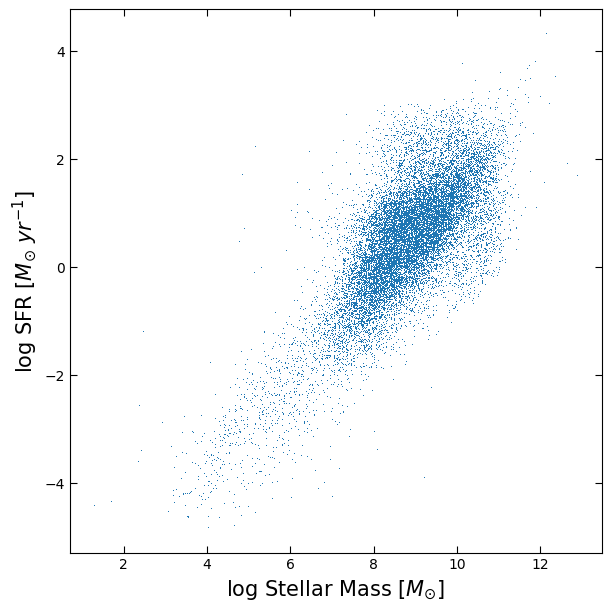

In [108]:
import matplotlib.pyplot as plt
import numpy as np

sf_ms_df = clean_df.loc[(np.log10(clean_df.sfr)>-5) & (clean_df.lmass>1.0)]
fig, ax = plt.subplots(figsize=(6,6),constrained_layout=True)

ax.plot(sf_ms_df.lmass,np.log10(sf_ms_df.sfr),',',)
ax.set_xlabel(r'log Stellar Mass [$M_{\odot}$]',fontsize=15)
ax.set_ylabel(r'log SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.tick_params(direction='in',length=5,top=True,right=True)

#### Exercise 11.4: 

Use pandas `.loc` indexing to create a new frame, `df_zoom`, containing only the rows with log masses in the range 7 to 11.5.

Also cut on **SFR**: take those with log **SFR** greater than -2.5

In [112]:
df_zoom = clean_df.loc[(clean_df.lmass > 7) & (clean_df.lmass < 11.5) & (np.log10(clean_df.sfr) > -2.5)]

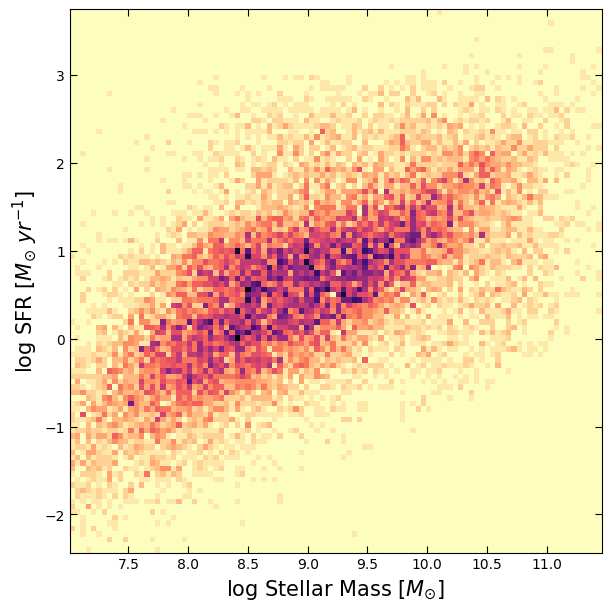

In [113]:
fig, ax = plt.subplots(figsize=(6,6),
                       constrained_layout=True)

ax.hist2d(df_zoom.lmass,
          np.log10(df_zoom.sfr),
          bins=100,
          cmap='magma_r')

ax.set_xlabel(r'log Stellar Mass [$M_{\odot}$]',fontsize=15)
ax.set_ylabel(r'log SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.tick_params(direction='in',length=5,top=True,right=True)

In [116]:
from scipy.stats import binned_statistic

bin_means, bin_edges, bin_number = binned_statistic(x = df_zoom.lmass.values,
                                                    values = np.log10(df_zoom.sfr), 
                                                    bins = 15, 
                                                    statistic = 'median')

In [118]:
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

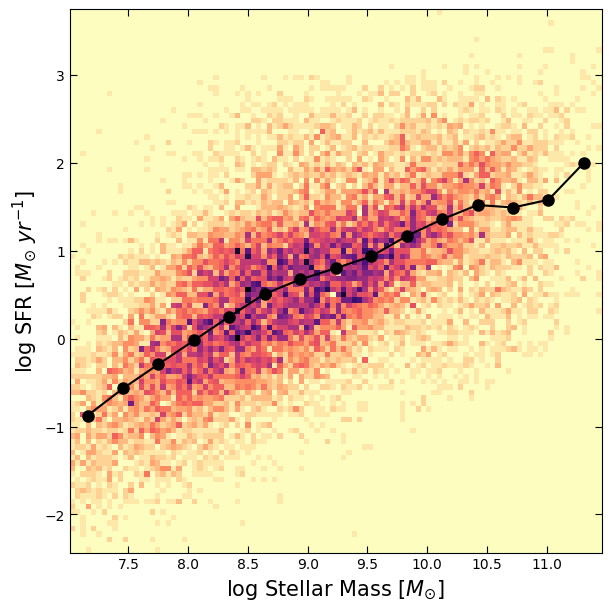

In [120]:
fig, ax = plt.subplots(figsize=(6,6),
                       constrained_layout=True)

ax.hist2d(df_zoom.lmass,
          np.log10(df_zoom.sfr),
          bins = 100,
          cmap = 'magma_r')
ax.plot(bin_centers,bin_means,'k')
ax.plot(bin_centers,bin_means,'o',ms=8,color='k')
ax.set_xlabel(r'log Stellar Mass [$M_{\odot}$]',fontsize=15)
ax.set_ylabel(r'log SFR [$M_{\odot}$ $yr^{-1}$]',fontsize=15)
ax.tick_params(direction='in',length=5,top=True,right=True)

In [122]:
smass_bins = pd.cut(df_zoom.lmass, 
                    bins = 12, 
                    retbins = True)

logdata={'log_smass':df_zoom.lmass,
         'log_sfr':np.log10(df_zoom.sfr),
         'smass_bin':smass_bins[0]}

log_sfr_df = pd.DataFrame(data = logdata)
log_sfr_df

,log_smass,log_sfr,smass_bin
0,10.46,2.331103,"(10.348, 10.718]"
1,10.41,2.282010,"(10.348, 10.718]"
2,10.45,0.393803,"(10.348, 10.718]"
3,10.16,2.486643,"(9.977, 10.348]"
4,8.81,0.760762,"(8.493, 8.864]"
...,...,...,...
18162,8.38,2.213332,"(8.123, 8.493]"
18166,9.33,-0.092992,"(9.235, 9.606]"
18167,11.41,3.081599,"(11.089, 11.46]"
18168,9.86,0.401194,"(9.606, 9.977]"


In [124]:
mean_grouped_df = log_sfr_df.groupby(['smass_bin'], observed=True).mean()
med_grouped_df = log_sfr_df.groupby(['smass_bin'], observed=True).median()
std_grouped_df = log_sfr_df.groupby(['smass_bin'], observed=True).std()

mean_grouped_df

,log_smass,log_sfr
smass_bin,,
"(7.006, 7.381]",7.221843,-0.772704
"(7.381, 7.752]",7.593970,-0.394160
"(7.752, 8.123]",7.950556,-0.075036
"(8.123, 8.493]",8.315394,0.275864
"(8.493, 8.864]",8.677456,0.558410
"(8.864, 9.235]",9.050799,0.770245
"(9.235, 9.606]",9.414558,0.907579
"(9.606, 9.977]",9.781272,1.189815
"(9.977, 10.348]",10.146080,1.341965


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 100)),
 array([ 7.01  ,  7.0545,  7.099 ,  7.1435,  7.188 ,  7.2325,  7.277 ,
         7.3215,  7.366 ,  7.4105,  7.455 ,  7.4995,  7.544 ,  7.5885,
         7.633 ,  7.6775,  7.722 ,  7.7665,  7.811 ,  7.8555,  7.9   ,
         7.9445,  7.989 ,  8.0335,  8.078 ,  8.1225,  8.167 ,  8.2115,
         8.256 ,  8.3005,  8.345 ,  8.3895,  8.434 ,  8.4785,  8.523 ,
         8.5675,  8.612 ,  8.6565,  8.701 ,  8.7455,  8.79  ,  8.8345,
         8.879 ,  8.9235,  8.968 ,  9.0125,  9.057 ,  9.1015,  9.146 ,
         9.1905,  9.235 ,  9.2795,  9.324 ,  9.3685,  9.413 ,  9.4575,
         9.502 ,  9.5465,  9.591 ,  9.6355,  9.68  ,  9.7245,  9.769 ,
         9.8135,  9.858 ,  9.9025,  9.947 ,  9.9915, 10.036 , 10.0805,
        10.125 , 10.169

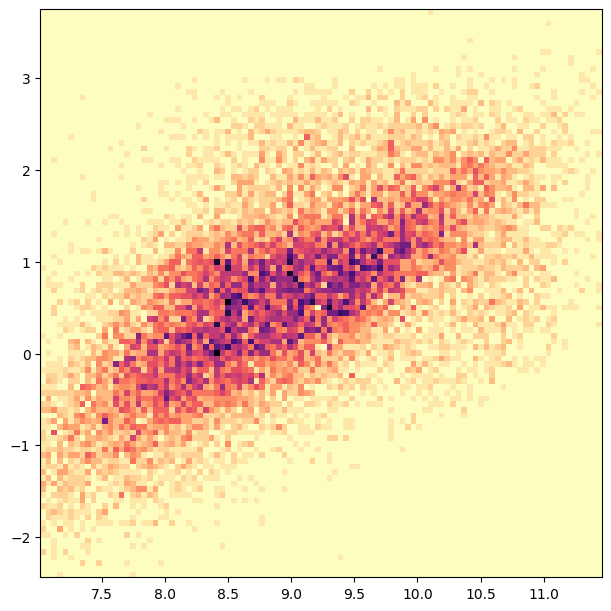

In [126]:
fig, ax = plt.subplots(figsize=(6,6),
                       constrained_layout=True)

ax.hist2d(df_zoom.lmass,
          np.log10(df_zoom.sfr),
          bins=100, 
          cmap='magma_r')

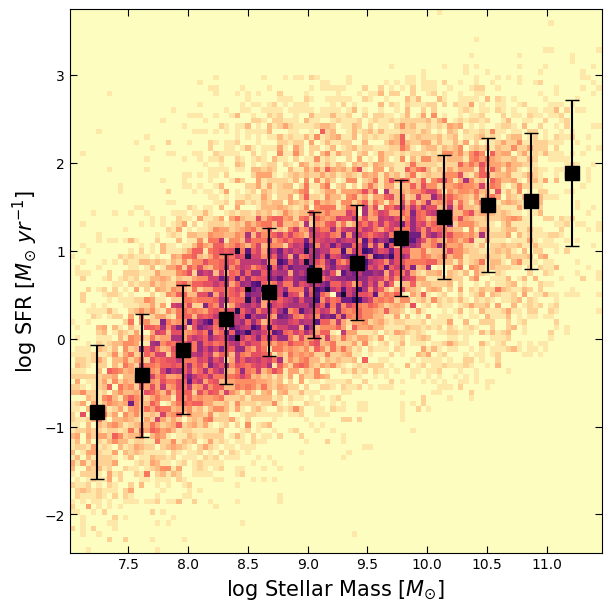

In [128]:
fig, ax = plt.subplots(figsize=(6,6),
                       constrained_layout=True)

ax.hist2d(df_zoom.lmass,
          np.log10(df_zoom.sfr),
          bins=100, 
          cmap='magma_r')

ax.errorbar(med_grouped_df['log_smass'],
            med_grouped_df['log_sfr'],
            yerr=std_grouped_df['log_sfr'],
            c='k',
            fmt='s',
            capsize=5,
            ecolor='k',
            markersize=10,
            label='binned median SFR')
ax.set_xlabel(r'log Stellar Mass [$M_{\odot}$]',
              fontsize=15)
ax.set_ylabel(r'log SFR [$M_{\odot}$ $yr^{-1}$]',
              fontsize=15)
ax.tick_params(direction='in',
               length=5,
               top=True,
               right=True)

### 11.4.2 UVJ Diagram

$$ U - V = -2.5log\frac{F_{U}}{F_{V}} $$

Text(0, 0.5, '$U-V$')

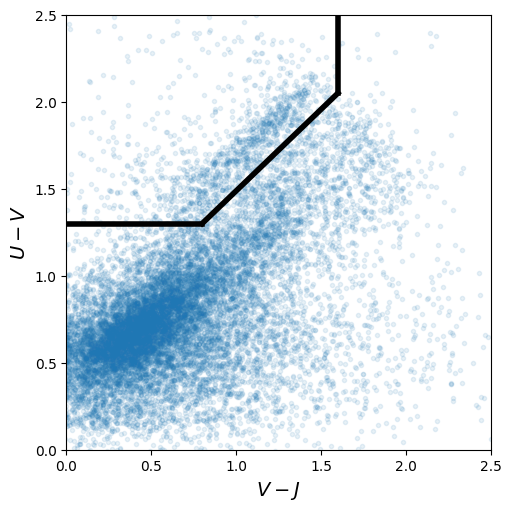

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# sf_ms_df = clean_df.loc[(clean_df.lsfr>-5)&(clean_df.lmass>1.0)
u_v = -2.5*np.log10(clean_df.U.values / clean_df.V.values)
v_j = -2.5*np.log10(clean_df.V.values/clean_df.J.values)
fig, ax = plt.subplots(figsize=(5,5),constrained_layout=True)
ax.plot(v_j, u_v, '.', alpha=0.1, rasterized=True)
ax.plot([0,0.8], [1.3,1.3], lw=4, color='k')
ax.plot([0.8,1.6], [1.3,2.05], lw=4, color='k')
ax.plot([1.6,1.6], [2.05,2.5], lw=4, color='k')
ax.set_xlim(0,2.5)
ax.set_ylim(0,2.5)
ax.set_xlabel(r'$V-J$', fontsize=14)
ax.set_ylabel(r'$U-V$', fontsize=14)

#### Excercise 11.6:

Construct a conditional to feed to `.loc` to return only the quiescent galaxies based on their position in UVJ space.

UVJ 다이어그램은 천문학에서 별 형성 갤럭시와 조용한(별 형성이 없는) 갤럭시를 구별하기 위해 널리 사용됨
- U, V, J는 각각 울트라바이올렛, 가시광선, 근적외선 영역의 색지수를 나타내며, 이 다이어그램은 별의 진화 상태와 별 형성율을 추정하는 중요한 정보를 제공

UVJ 다이어그램에서 갤럭시는 일반적으로 '별 형성 갤럭시'와 '조용한 갤럭시'로 분류 
- 조용한 갤럭시는 낮은 별 형성률을 가지며 다이어그램의 특정 영역에 위치
    + 이 영역은 보통 U-V와 V-J 색지수에 따라 정의됩니다.

판다스 DataFrame에서 조용한 갤럭시만 선택하려면, .loc 메소드를 사용하여 조건 구현 가능
- U-V 색지수가 특정 임계값보다 높아야 하며,
- V-J 색지수는 일반적으로 낮은 임계값과 높은 임계값 사이에 있어야 함

In [136]:
quiescent_condition = (
    (v_j <= 0.8) & (u_v >= 1.3) |
    (v_j > 0.8) & (v_j <= 1.6) & (u_v >= (0.875 * v_j + 0.925)) |
    (v_j > 1.6) & (u_v >= 2.05)
)

quiescent_galaxies = clean_df.loc[quiescent_condition]

In [137]:
quiescent_galaxies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 0 to 18169
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      610 non-null    int64  
 1   z_best  610 non-null    float64
 2   z_type  610 non-null    int64  
 3   sfr     610 non-null    float64
 4   flag    610 non-null    int64  
 5   metal   610 non-null    float64
 6   lage    610 non-null    float64
 7   lmass   610 non-null    float64
 8   x       610 non-null    float64
 9   y       610 non-null    float64
 10  ra      610 non-null    float64
 11  dec     610 non-null    float64
 12  U       610 non-null    float64
 13  B       610 non-null    float64
 14  V       610 non-null    float64
 15  J       610 non-null    float64
 16  H       610 non-null    float64
 17  K       610 non-null    float64
dtypes: float64(15), int64(3)
memory usage: 90.5 KB


In [148]:
clean_df.shape

(18170, 18)

In [149]:
fast_use2 = fast_df[['id', 'lssfr']]

temp_df = pd.merge(clean_df, fast_use2, on = 'id', how = 'inner')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18170 entries, 0 to 18169
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18170 non-null  int64  
 1   z_best  18170 non-null  float64
 2   z_type  18170 non-null  int64  
 3   sfr     18170 non-null  float64
 4   flag    18170 non-null  int64  
 5   metal   18170 non-null  float64
 6   lage    18170 non-null  float64
 7   lmass   18170 non-null  float64
 8   x       18170 non-null  float64
 9   y       18170 non-null  float64
 10  ra      18170 non-null  float64
 11  dec     18170 non-null  float64
 12  U       18170 non-null  float64
 13  B       18170 non-null  float64
 14  V       18170 non-null  float64
 15  J       18170 non-null  float64
 16  H       18170 non-null  float64
 17  K       18170 non-null  float64
 18  lssfr   18170 non-null  float64
dtypes: float64(16), int64(3)
memory usage: 2.6 MB


In [152]:
temp_df['ssfr'] = 10**temp_df['lssfr']

Text(0, 0.5, '$U-V$')

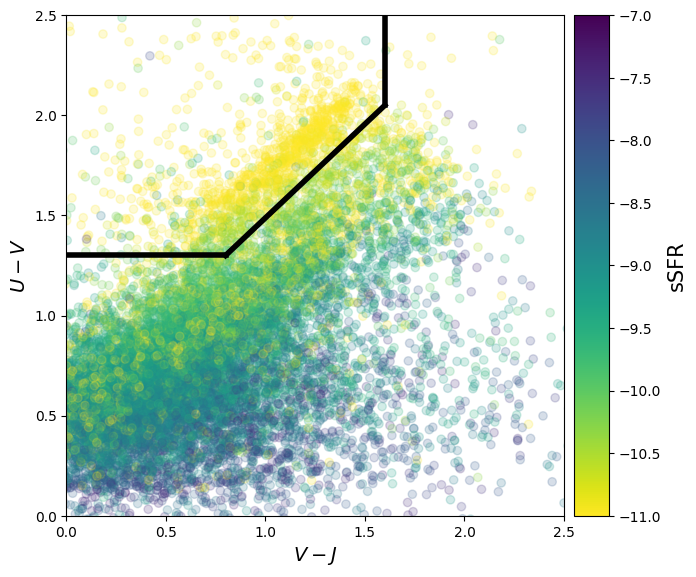

In [158]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6.5))
mapp = ax.scatter(v_j,
                  u_v,
                  c=temp_df.lssfr,
                  marker='o',
                  alpha=0.2,
                  rasterized=True,
                  cmap='viridis_r',
                  vmin=-11,
                  vmax=-7)

ax_divider = make_axes_locatable(ax)

cax = ax_divider.append_axes('right', size='7%', pad='2%')

cbar =plt.colorbar(mapp,
                   cax=cax,
                   label='sSFR')

cbar.set_label('sSFR',size=15)
cbar.solids.set(alpha=1)

ax.plot([0,0.8],[1.3,1.3],lw=4,color='k')
ax.plot([0.8,1.6],[1.3,2.05],lw=4,color='k')
ax.plot([1.6,1.6],[2.05,2.5],lw=4,color='k')
ax.set_xlim(0,2.5)
ax.set_ylim(0,2.5)
ax.set_xlabel(r'$V-J$',fontsize=14)
ax.set_ylabel(r'$U-V$',fontsize=14)

#### Exercise 11.7

Does a galaxy's size correlate with its mass? For this exercise, you will need to return to the `photometry` catalog and extract the `flux_radius` column to add to your frame. This quantity is the effective radius (the radius which contains half the total light from the galaxy). We use this as a measure of galaxy size. Again using the six redshift bins (but ignoring the highest-redshift few, which do not have many galaxies), plot the galaxy sizes versus their log stellar mass. Are the two correlated? Does the ralation shift with redshift? 

Replot, but split or color your sample by whether galaxies are quiescent or star forming (use either your UVJ or the sSFR value to make this split). You can check your work by reading Miller et al.(2019)

## 11.5 Summary